In [14]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
img = cv2.imread('./test/bb41267a29.jpg')
img.shape

(231, 218, 3)

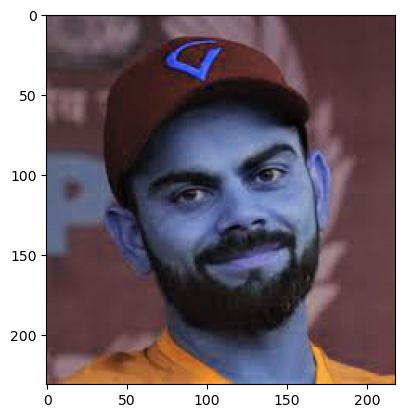

In [16]:
plt.imshow(img)

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(231, 218)

In [18]:
gray

array([[ 90,  87,  84, ...,  55,  51,  51],
       [ 92,  89,  86, ...,  55,  51,  51],
       [ 95,  92,  90, ...,  55,  52,  52],
       ...,
       [ 96,  91,  83, ..., 132, 120, 120],
       [ 92,  89,  83, ..., 137, 114, 114],
       [ 91,  89,  85, ..., 123, 108, 108]], dtype=uint8)

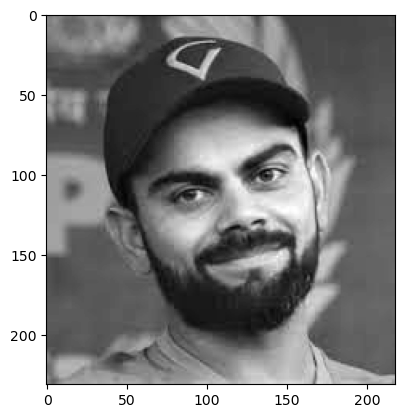

In [19]:
plt.imshow(gray, cmap='gray')

In [20]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

face = face_cascade.detectMultiScale(gray, 1.3, 5)
face

array([[ 52,  53, 135, 135]])

In [21]:
## x,y,width,height

(x,y,w,h) = face[0]
x,y,w,h

(52, 53, 135, 135)

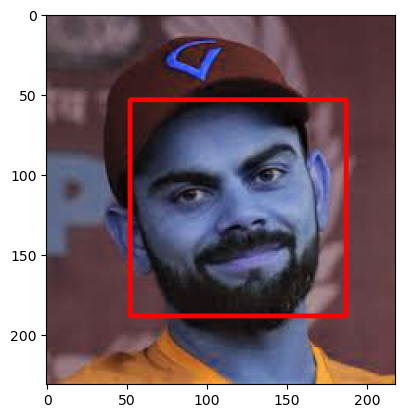

In [22]:
## rectangle on original image,red color
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

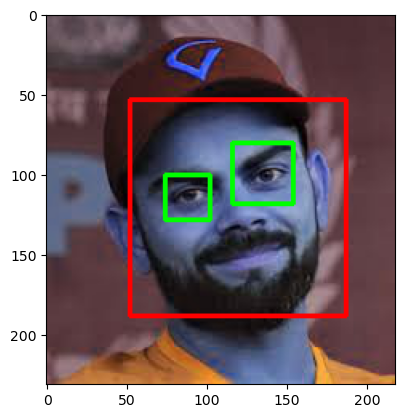

In [44]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
   
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

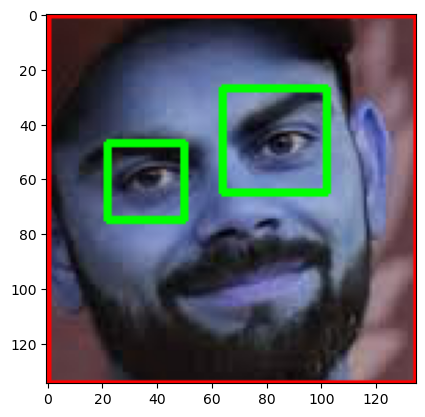

In [45]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

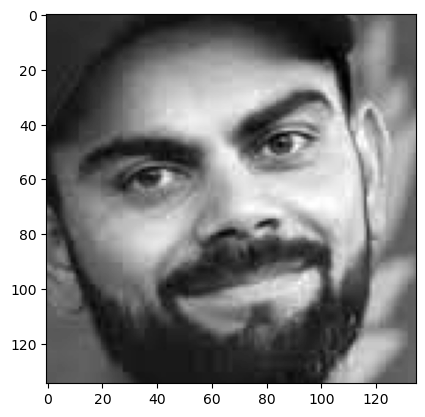

In [46]:
plt.imshow(roi_gray, cmap='gray')

## function to crop all images like above

In [71]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            ##print(roi_color) ## to check invalid out
            return roi_color

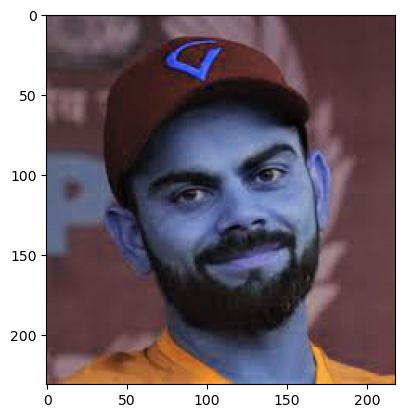

In [52]:
original_image = cv2.imread('./test/bb41267a29.jpg')
plt.imshow(original_image)

In [72]:
demo = get_cropped_image_if_2_eyes('./test/bb41267a29.jpg')

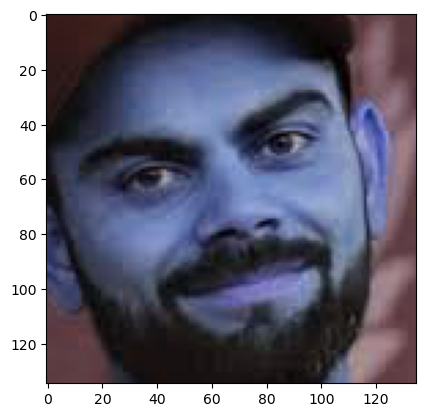

In [73]:
## returm roi_color but not eyes
plt.imshow(demo)

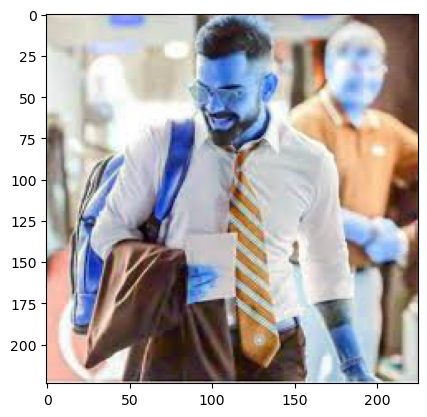

In [58]:
flaw = cv2.imread('./test/fc47090678.jpg')
plt.imshow(flaw)

In [74]:
## Invalid image 
cropped_no_2_eyes = get_cropped_image_if_2_eyes('./test/fc47090678.jpg')
cropped_no_2_eyes  ##None

In [158]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/crop/"

In [159]:
## to navigate all subfolders inside path
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [160]:
img_dirs

['./datasets/djokovic',
 './datasets/lulu',
 './datasets/ricky_ponting',
 './datasets/ronaldo',
 './datasets/virat_kohli']

In [161]:
## This code will generate crop folder 
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [162]:
img_dirs

['./datasets/djokovic',
 './datasets/lulu',
 './datasets/ricky_ponting',
 './datasets/ronaldo',
 './datasets/virat_kohli']

In [163]:
##crop all datasets
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] ## return last
    print(celebrity_name) ## debug u would get all celeb
    
    celebrity_file_names_dict[celebrity_name] = []
    
    ## iterate over every folder and use get_crop..function 
    ## path_to_cr_data is this = "./datasets/crop/"
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path) ## path of image
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png" ## new name
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   
            
            
        

djokovic
Generating cropped images in folder:  ./datasets/crop/djokovic
lulu
Generating cropped images in folder:  ./datasets/crop/lulu
ricky_ponting
Generating cropped images in folder:  ./datasets/crop/ricky_ponting
ronaldo
Generating cropped images in folder:  ./datasets/crop/ronaldo
virat_kohli
Generating cropped images in folder:  ./datasets/crop/virat_kohli


## Cleaning done

## wavelet transofrmv-similar to fourier


In [164]:
## credits stackoverflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

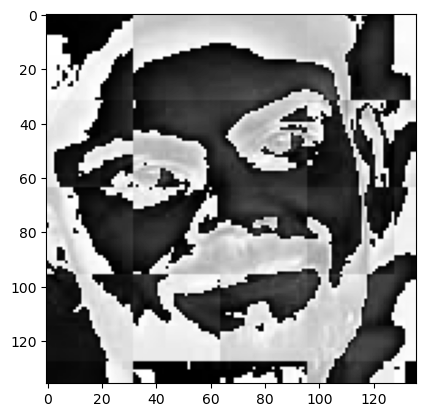

In [165]:
im_har = w2d(demo,'db1',5)
plt.imshow(im_har, cmap='gray')

In [166]:
##You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. 
##This along with raw pixel image can be used as an input for our classifier


In [167]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'djokovic': ['./datasets/crop/djokovic\\djokovic1.png',
  './datasets/crop/djokovic\\djokovic2.png',
  './datasets/crop/djokovic\\djokovic3.png',
  './datasets/crop/djokovic\\djokovic4.png',
  './datasets/crop/djokovic\\djokovic5.png',
  './datasets/crop/djokovic\\djokovic6.png',
  './datasets/crop/djokovic\\djokovic7.png',
  './datasets/crop/djokovic\\djokovic8.png'],
 'lulu': ['./datasets/crop/lulu\\lulu1.png',
  './datasets/crop/lulu\\lulu10.png',
  './datasets/crop/lulu\\lulu11.png',
  './datasets/crop/lulu\\lulu12.png',
  './datasets/crop/lulu\\lulu13.png',
  './datasets/crop/lulu\\lulu14.png',
  './datasets/crop/lulu\\lulu15.png',
  './datasets/crop/lulu\\lulu16.png',
  './datasets/crop/lulu\\lulu17.png',
  './datasets/crop/lulu\\lulu2.png',
  './datasets/crop/lulu\\lulu3.png',
  './datasets/crop/lulu\\lulu4.png',
  './datasets/crop/lulu\\lulu5.png',
  './datasets/crop/lulu\\lulu6.png',
  './datasets/crop/lulu\\lulu7.png',
  './datasets/crop/lulu\\lulu8.png',
  './datasets/crop/

## scale all the images to same height & width

In [169]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'djokovic': 0, 'lulu': 1, 'ricky_ponting': 2, 'ronaldo': 3, 'virat_kohli': 4}

In [170]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [171]:
len(X)  ## all images

70

In [172]:
32*32*3+32*32 ##size

4096

In [174]:
X[0]

array([[ 46],
       [ 51],
       [ 50],
       ...,
       [247],
       [202],
       [  8]], dtype=uint8)

In [176]:
y[0]

0

In [175]:
## convert to float just to avoid warnings from scikit learn
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(70, 4096)

In [177]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5

In [179]:
len(X_test)

18

In [180]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         7
           3       0.30      1.00      0.46         3
           4       0.67      0.67      0.67         6

    accuracy                           0.50        18
   macro avg       0.59      0.73      0.63        18
weighted avg       0.38      0.50      0.41        18



C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
 ##GridSearch is to try out different models with different parameters
    
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


## Nested Model dict  Grid search cv

In [185]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__max_depth': [None, 5, 10],
            'decisiontreeclassifier__criterion': ['gini', 'entropy']
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [187]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    ## k fold-cross validation
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.692727,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,decision_tree,0.598182,{'decisiontreeclassifier__criterion': 'entropy...
2,random_forest,0.672727,{'randomforestclassifier__n_estimators': 10}
3,logistic_regression,0.654545,{'logisticregression__C': 1}


In [188]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'decision_tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(criterion='entropy', max_depth=10))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [189]:
best_estimators['svm'].score(X_test,y_test)

0.6111111111111112

In [190]:
best_estimators['random_forest'].score(X_test,y_test)

0.3888888888888889

In [191]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [192]:
best_estimators['decision_tree'].score(X_test,y_test)

0.4444444444444444

In [193]:
best_clf = best_estimators['logistic_regression']

In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 7, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 6]], dtype=int64)

## confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

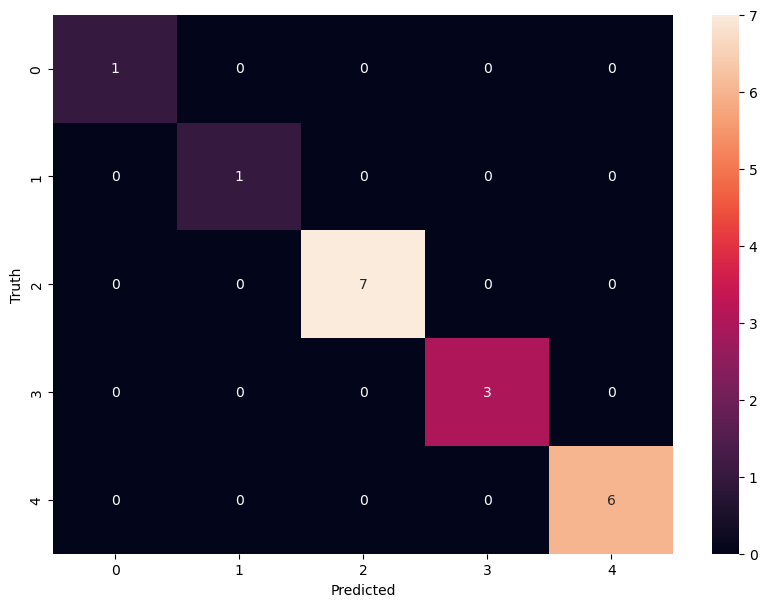

In [195]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [196]:
class_dict

{'djokovic': 0, 'lulu': 1, 'ricky_ponting': 2, 'ronaldo': 3, 'virat_kohli': 4}

save model

In [197]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'imgcls_model.pkl') 

['imgcls_model.pkl']

Saving class dict for future

In [198]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))